# Micro Credit Defaulter

In [1]:
import pandas as pd
Credit=pd.read_csv("Data-file.csv",sep=",") #reading Credit.csv file
pd.set_option('display.max_columns', None)
Credit.head() #Looking into top 5 rows

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [2]:
Credit.dtypes #Checking the datatype of each attribute

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [3]:
Credit.shape

(209593, 37)

In [4]:
Credit['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

As per problem statement Target variable i.e. label is int64 but it have only 1 and 0 i.e. object so we'll use Classification to learn our model.

# Exploratory Data Analysis

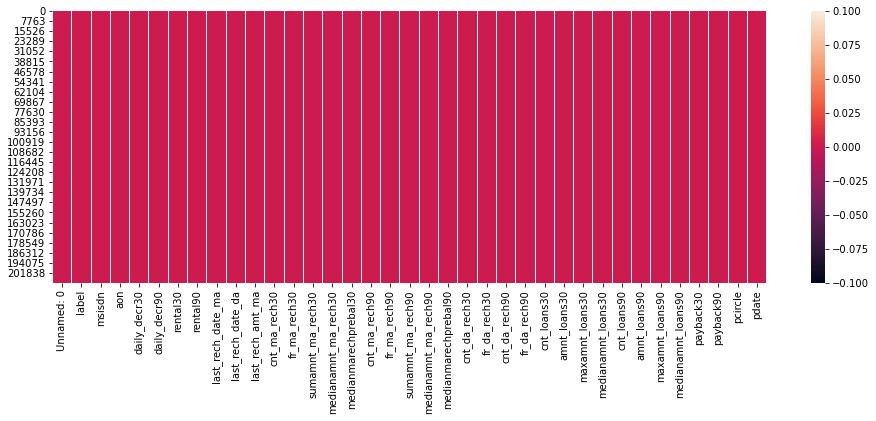

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (16,5))
sns.heatmap(Credit.isnull()) #Looking for null values if any, in heatmap

No null value present in the dataset

In [6]:
#Removing unwanted columns
Credit.drop('Unnamed: 0', axis = 1, inplace = True)
Credit.drop('msisdn', axis = 1, inplace = True)
#Unnamed:0 is row number and is phone number which is not gonna use to train our data

In [7]:
rows = Credit.shape[0]
Defaulter = Credit[Credit["label"] == 0].shape[0]
Non_Defaulter = Credit[Credit["label"] == 1].shape[0]
print("Total records = ",rows)
print("Defaulter     = ",Defaulter)
print("Non_Defaulter = ",Non_Defaulter)

Total records =  209593
Defaulter     =  26162
Non_Defaulter =  183431


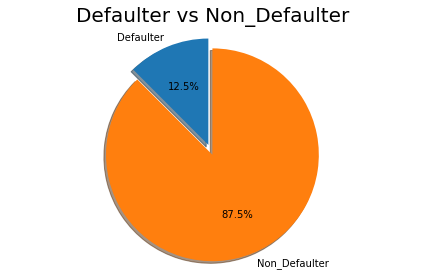

In [8]:
labels = ['Defaulter','Non_Defaulter']
sizes = [(Defaulter/rows)*100 , (Non_Defaulter/rows)*100]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Defaulter vs Non_Defaulter", fontsize = 20)
plt.tight_layout()
plt.show()

12.5% people are Defaulter where as 87.5% people are not defaulter.

In [9]:
list1 = [Credit]
for col in list1:
    col.loc[col["rental30"] <= 0,  'balance_group'] = 'no balance'
    col.loc[(col["rental30"] > 0) & (col["rental30"] <= 19766), 'balance_group'] = 'low balance'
    col.loc[(col["rental30"] > 19766) & (col["rental30"] <= 118572), 'balance_group'] = 'average balance'
    col.loc[(col["rental30"] > 118572), 'balance_group'] = 'high balance'

In [10]:
Credit['balance_group'].value_counts()

low balance        194425
no balance          13194
average balance      1971
high balance            3
Name: balance_group, dtype: int64

In [11]:
pd.crosstab(Credit['label'],Credit['balance_group'])

balance_group,average balance,high balance,low balance,no balance
label,,,,
0,186,0,21924,4052
1,1785,3,172501,9142


In [12]:
#Convert values in percentage and converted rows into column and columns into rows
balance_group_value = pd.crosstab(Credit['label'],Credit['balance_group']).apply(lambda x: x/x.sum() * 100)
balance_group_value = balance_group_value.transpose()

In [13]:
balance_group_value.head()

label,0,1
balance_group,,
average balance,9.436834,90.563166
high balance,0.000000,100.000000
low balance,11.276328,88.723672
no balance,30.710929,69.289071


In [14]:
bal = pd.DataFrame(Credit['balance_group'].value_counts())
bal['Percentage'] = balance_group_value[1]
bal.drop('balance_group',axis = 1,inplace = True)
bal['arr'] = [2,3,1,0]
bal = bal.sort_values('arr',ascending = True)

In [15]:
bal.head() #Looking into top rows

,Percentage,arr
high balance,100.000000,0
average balance,90.563166,1
low balance,88.723672,2
no balance,69.289071,3


high balance       100.000000
average balance     90.563166
low balance         88.723672
no balance          69.289071
Name: Percentage, dtype: float64


[]

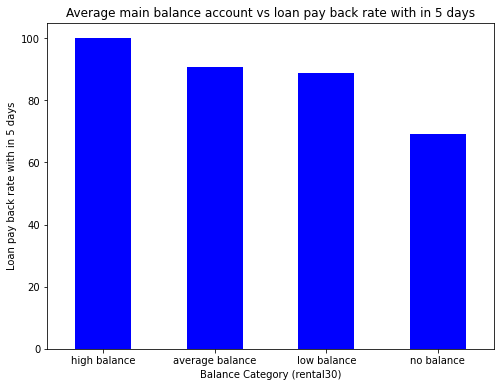

In [16]:
plot_balance = bal['Percentage'].plot(kind = 'bar',color = ('blue'),figsize = (8,6))
plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')
print(bal['Percentage'])
plt.plot()

We can clearly see that the customer who have high balance that customer is able to pay is loan in 5 days.

Customer who has average balance and low balance in that 10-12% people does not pay loan within 5 days.

The customer who is having low balance that more than 30% customer are not paying loan within 5 days.

In [17]:
list1 = [Credit]
for col in list1:
    col.loc[col["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    col.loc[(col['fr_ma_rech30'] > 0) & (col['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    col.loc[(col['fr_ma_rech30'] >1) & (col['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    col.loc[(col['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [18]:
#Convert values in percentage and converted rows into column and columns into rows
frequency_group_count = pd.crosstab(Credit['label'],Credit['frequency_group']).apply(lambda x: x/x.sum() * 100)
frequency_group_count = frequency_group_count.transpose()

In [19]:
frequency_group_count.head()

label,0,1
frequency_group,,
high frequency,5.481040,94.518960
low frequency,4.304873,95.695127
medium frequency,3.787999,96.212001
no frequency,24.870684,75.129316


In [20]:
fre = pd.DataFrame(Credit['frequency_group'].value_counts())
fre['Percentage'] = frequency_group_count[1]
fre.drop('frequency_group',axis = 1,inplace = True)
fre['fre'] = [3,0,1,2]
fre= fre.sort_values('fre',ascending = True)

In [21]:
fre.head() #Looking into top rows

,Percentage,fre
no frequency,75.129316,0
low frequency,95.695127,1
medium frequency,96.212001,2
high frequency,94.518960,3


no frequency        75.129316
low frequency       95.695127
medium frequency    96.212001
high frequency      94.518960
Name: Percentage, dtype: float64


[]

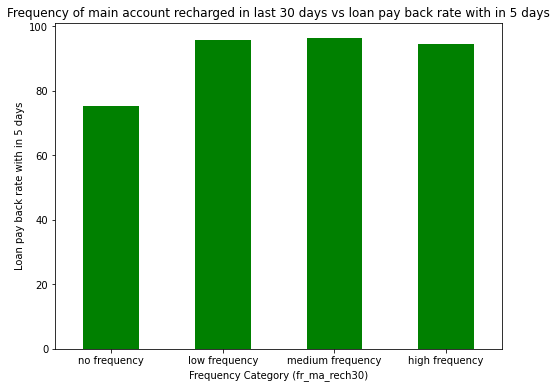

In [22]:
plot_fre = fre['Percentage'].plot(kind = 'bar',color = ('green'),figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')
print(fre['Percentage'])
plt.plot()

Customer who have low frequency of main account recharged in last 30 days in that almost 25% customers are not paying loan within 5 days.

Customer who have low, medium and high frequency of main account recharged in last 30 days in that almost 45-5.5% people are not paying loan within 5 days.

In [23]:
list1 = [Credit]
for col in list1:
    col.loc[col["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    col.loc[(col['cnt_loans30'] > 0) & (col['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    col.loc[(col['cnt_loans30'] >1) & (col['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    col.loc[(col['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [24]:
#Convert values in percentage and converted rows into column and columns into rows
loan_frequency_group_count = pd.crosstab(Credit['label'],Credit['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
loan_frequency_group_count = loan_frequency_group_count.transpose()

In [25]:
pd.crosstab(Credit['label'],Credit['loan_frequency_group'])

loan_frequency_group,high num of loans,low num of loans,medium num of loans,no loans
label,,,,
0,578,20001,5583,0
1,35110,63431,81631,3259


In [26]:
fre = pd.DataFrame(Credit['loan_frequency_group'].value_counts())
fre['Percentage'] = loan_frequency_group_count[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)
fre['fre'] = [2,1,3,0]
fre= fre.sort_values('fre',ascending = True)

In [27]:
fre.head() #Looking into top rows

,Percentage,fre
no loans,100.000000,0
low num of loans,76.027184,1
medium num of loans,93.598505,2
high num of loans,98.380408,3


no loans               100.000000
low num of loans        76.027184
medium num of loans     93.598505
high num of loans       98.380408
Name: Percentage, dtype: float64


[]

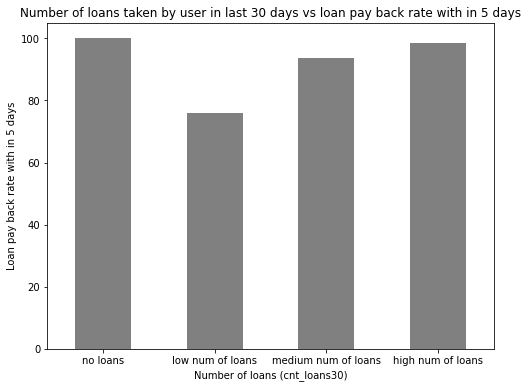

In [28]:
plot_fre = fre['Percentage'].plot(kind = 'bar',color = ('Grey'), figsize = (8,6))
plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.xlabel('Number of loans (cnt_loans30)')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')
print(fre['Percentage'])
plt.plot()

When no loan taken than no need to pay back, So we can leave this.

When number of loans are less i.e. when only 1 loan is taken that time 24% customer was not able to pay the loan in 5 days.

When Customer took 2,3, and 4 loan that time almost 6.5% customers were not able to pay the loan in 5 days.

When Customer took more than 4 loan that time almost 1.62% customers were not able to pay the loan in 5 days.

In [29]:
list1 = [Credit]
for col in list1:
    col.loc[col["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    col.loc[(col['amnt_loans30'] > 0) & (col['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    col.loc[(col['amnt_loans30'] >6) & (col['amnt_loans30'] <=12), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    col.loc[(col['amnt_loans30'] >12), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [30]:
loanamnt_frequency_group_count = pd.crosstab(Credit['label'],Credit['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
loanamnt_frequency_group_count = loanamnt_frequency_group_count.transpose()

In [31]:
fre = pd.DataFrame(Credit['loanamnt_frequency_group'].value_counts())
fre['Percentage'] = loanamnt_frequency_group_count[1]
fre.drop('loanamnt_frequency_group',axis = 1,inplace = True)
fre['fre'] = [3,1,2,0]
fre= fre.sort_values('fre',ascending = True)

In [32]:
fre.head() #Looking into top rows

,Percentage,fre
no loans,100.000000,0
low amnt of loans,74.347429,1
medium amnt of loans,91.454128,2
high amnt of loans,96.819407,3


no loans                100.000000
low amnt of loans        74.347429
medium amnt of loans     91.454128
high amnt of loans       96.819407
Name: Percentage, dtype: float64


[]

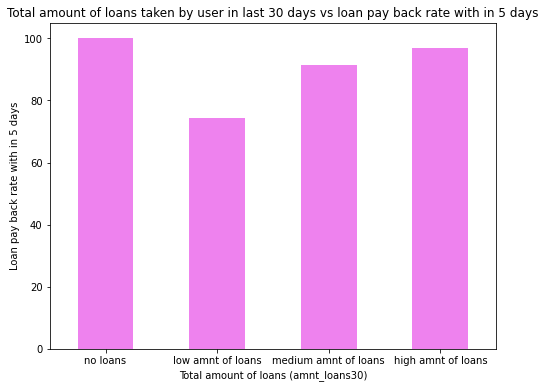

In [33]:
plot_fre = fre['Percentage'].plot(kind = 'bar',color = ('violet'), figsize = (8,6))
plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')
print(fre['Percentage'])
plt.plot()

When no loan taken than no need to pay back, So we can leave this.

When amount of loan is less i.e. between 1-6 that time 26% customer was not able to pay the loan in 5 days.

When amount of loan is medium i.e. between 7-12 that time almost 8.5% customers were not able to pay the loan in 5 days.

When amount of loan is high i.e. more than 12 that time almost 3.2% customers were not able to pay the loan in 5 days

In [34]:
Credit.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,balance_group,frequency_group,loan_frequency_group,loanamnt_frequency_group
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,low balance,high frequency,medium num of loans,medium amnt of loans
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,low balance,no frequency,low num of loans,medium amnt of loans
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,low balance,no frequency,low num of loans,low amnt of loans
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,low balance,no frequency,medium num of loans,medium amnt of loans
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,low balance,medium frequency,high num of loans,high amnt of loans


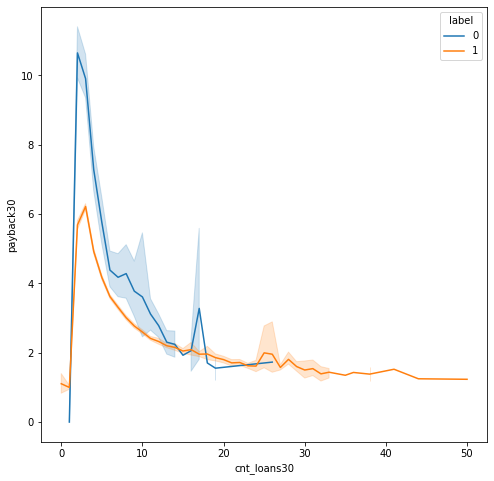

In [35]:
#Number of loans taken by Customer in last 30 days and payback of loan in 30 days over label
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'cnt_loans30', y='payback30', hue='label', data=Credit)

If customer took more than 25 loan than in that case he/she repayed the loan on time always.

When customer took approx 2-4 loan that time he/she didn't pay the loan back on time.

In [36]:
#dropping few columns because pcircle have same value across all the rows, pdate will help us to learn our model and other columns we created for our plottings.
Credit.drop(['pcircle', 'pdate','balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
Credit.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


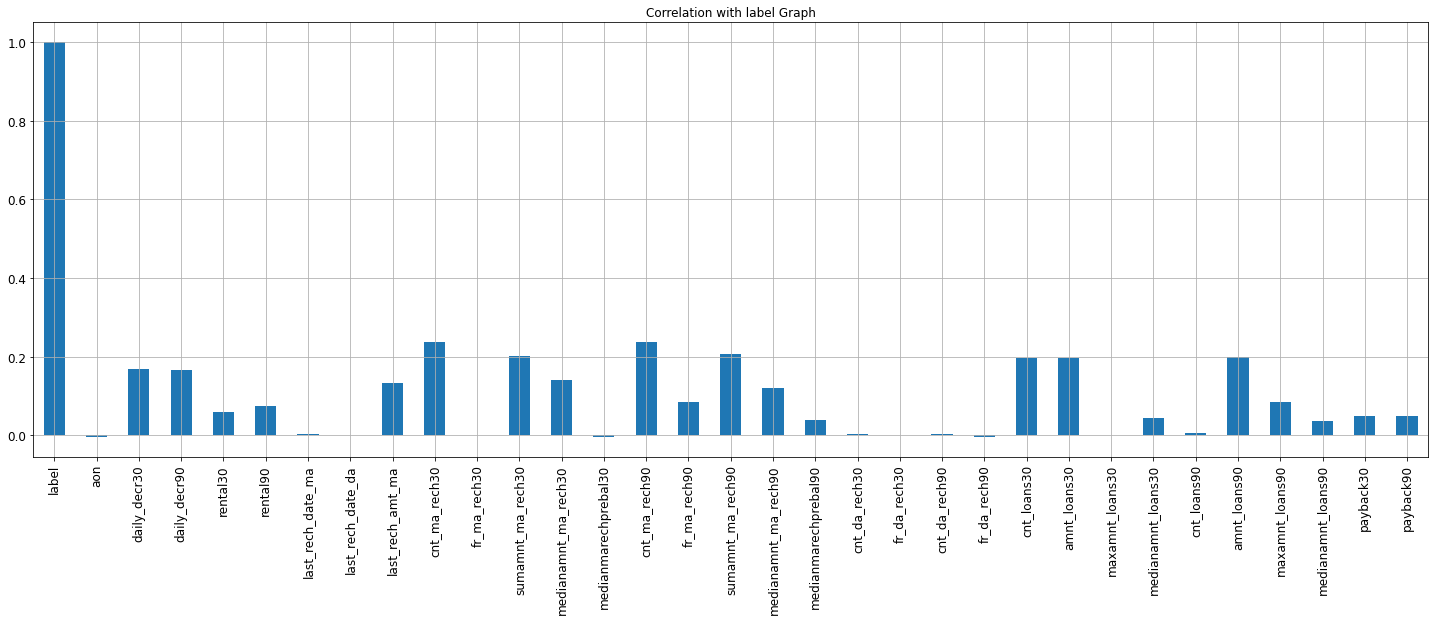

In [37]:
#Correlation with label with respect to attributes
Credit.corrwith(Credit.label).plot.bar(
        figsize = (25, 8), title = "Correlation with label Graph", fontsize = 12,
        rot = 90, grid = True)

cnt_ma_rec30 and cnt_ma_rech90 have heighst correlation 24% and lowest last_rechdate_da, fr_ma_rech30, fr_da_rech30 and maxamnt_loans30 approx 0.

In [38]:
#Converting object column into numbers , if any, using label encoder.
import numpy as np
from sklearn.preprocessing import LabelEncoder
for column in Credit.columns:
    if Credit[column].dtype == np.number:
        continue
    Credit[column] = LabelEncoder().fit_transform(Credit[column])

In [39]:
#Checking the skewness of the data
Credit.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         1.074621
cnt_ma_rech30            2.684106
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            2.886544
fr_ma_rech90             2.285423
sumamnt_ma_rech90        1.732703
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           23.642903
fr_da_rech90            26.899282
cnt_loans30              2.685234
amnt_loans30             2.955552
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.136189
maxamnt_loans9

# Removing Outliers

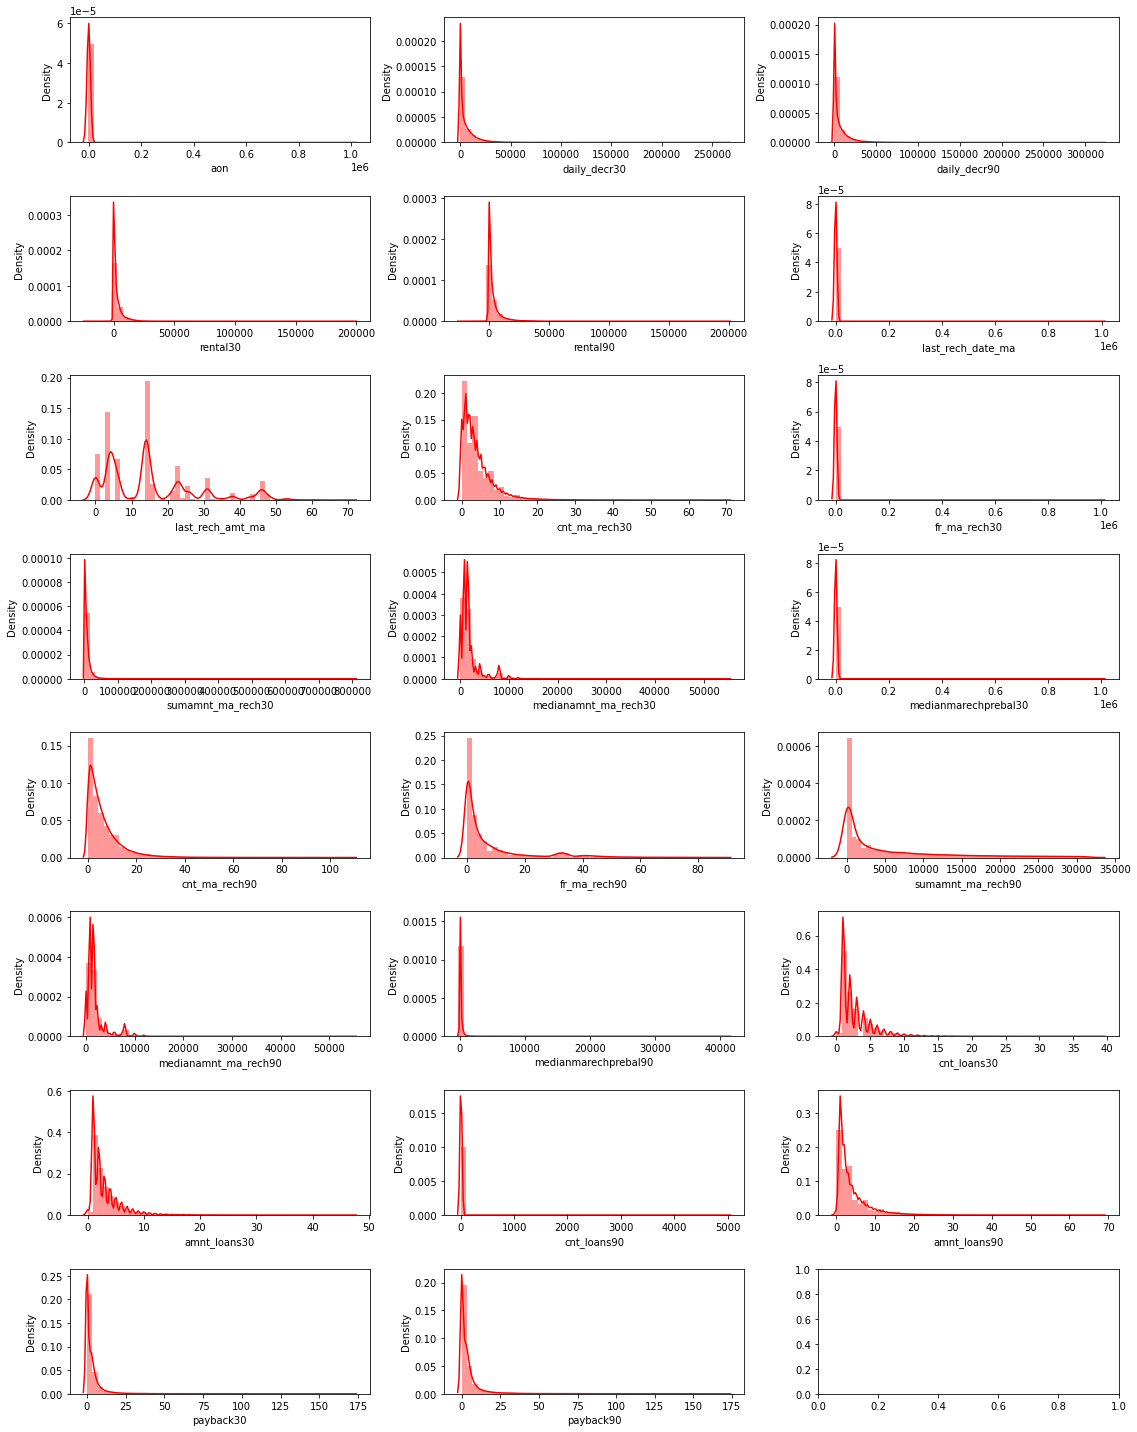

In [40]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90',
        'cnt_loans30', 'amnt_loans30','cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(Credit[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

We can clearly see that some of the columns are right skewed and some of the columns are left skewed of we'll try to remove the skewness by replacing outliers by medium of the colums.

In [41]:
#This function is to reduce the outliers of the data
def outliers_IQR3R(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR)
    median = data_frame[feature_name].median()
    data_frame.loc[data_frame[feature_name] > upper_bridge,feature_name] = median
    data_frame.loc[data_frame[feature_name] < lower_bridge,feature_name] = median

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.stats import zscore
for i in columns:
    outliers_IQR3R(Credit,i)

In [43]:
#Calling the function 2nd time. In order to remove more outliers.
for i in columns:
    outliers_IQR3R(Credit,i)

In [44]:
#If skewness of the data is more than .5 than we'll perform cube root.
for i in columns:
    if abs(Credit.loc[:,i].skew())>0.5:
        Credit.loc[:,i]=np.cbrt(Credit.loc[:,i].values.reshape(-1,1))

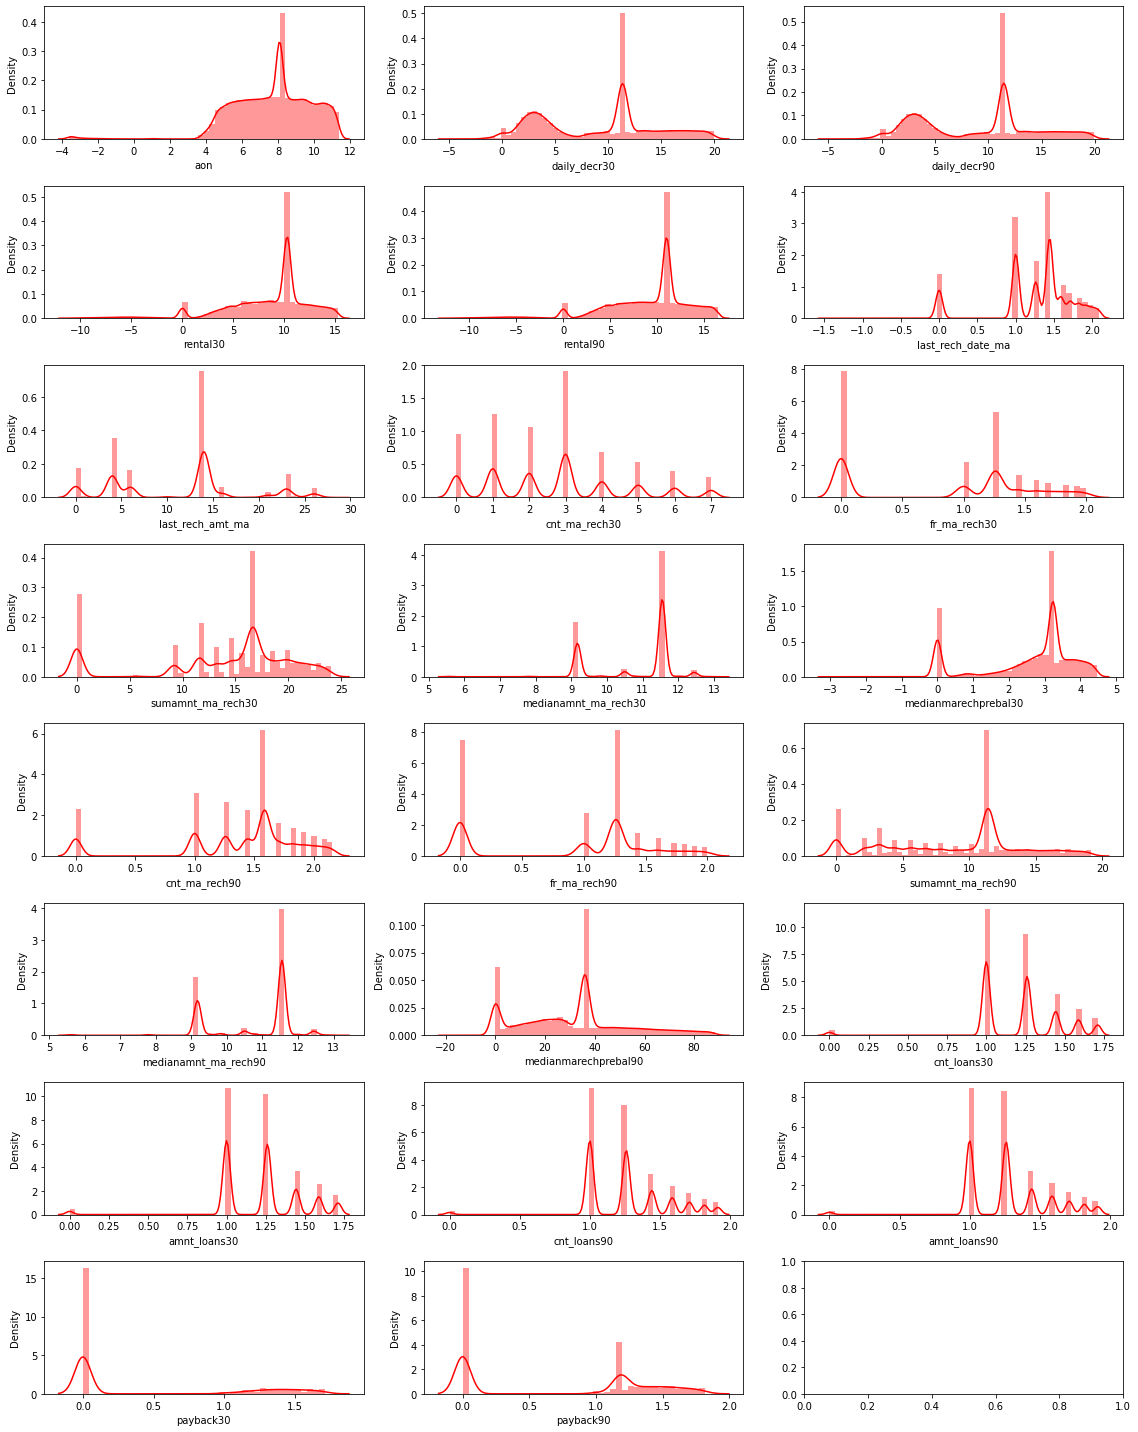

In [45]:
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(Credit[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

In [46]:
Credit.skew() #Checking the skewness of the data

label                   -2.270254
aon                     -0.958049
daily_decr30             0.087079
daily_decr90             0.068941
rental30                -1.367941
rental90                -1.274668
last_rech_date_ma       -1.168397
last_rech_date_da       14.814857
last_rech_amt_ma         0.152804
cnt_ma_rech30            0.476959
fr_ma_rech30            -0.181666
sumamnt_ma_rech30       -1.065672
medianamnt_ma_rech30    -0.953693
medianmarechprebal30    -1.072406
cnt_ma_rech90           -1.317578
fr_ma_rech90            -0.416875
sumamnt_ma_rech90       -0.213993
medianamnt_ma_rech90    -0.954427
medianmarechprebal90     0.448440
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           23.642903
fr_da_rech90            26.899282
cnt_loans30             -0.933652
amnt_loans30            -1.022323
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             -0.151446
amnt_loans90            -0.196201
maxamnt_loans9

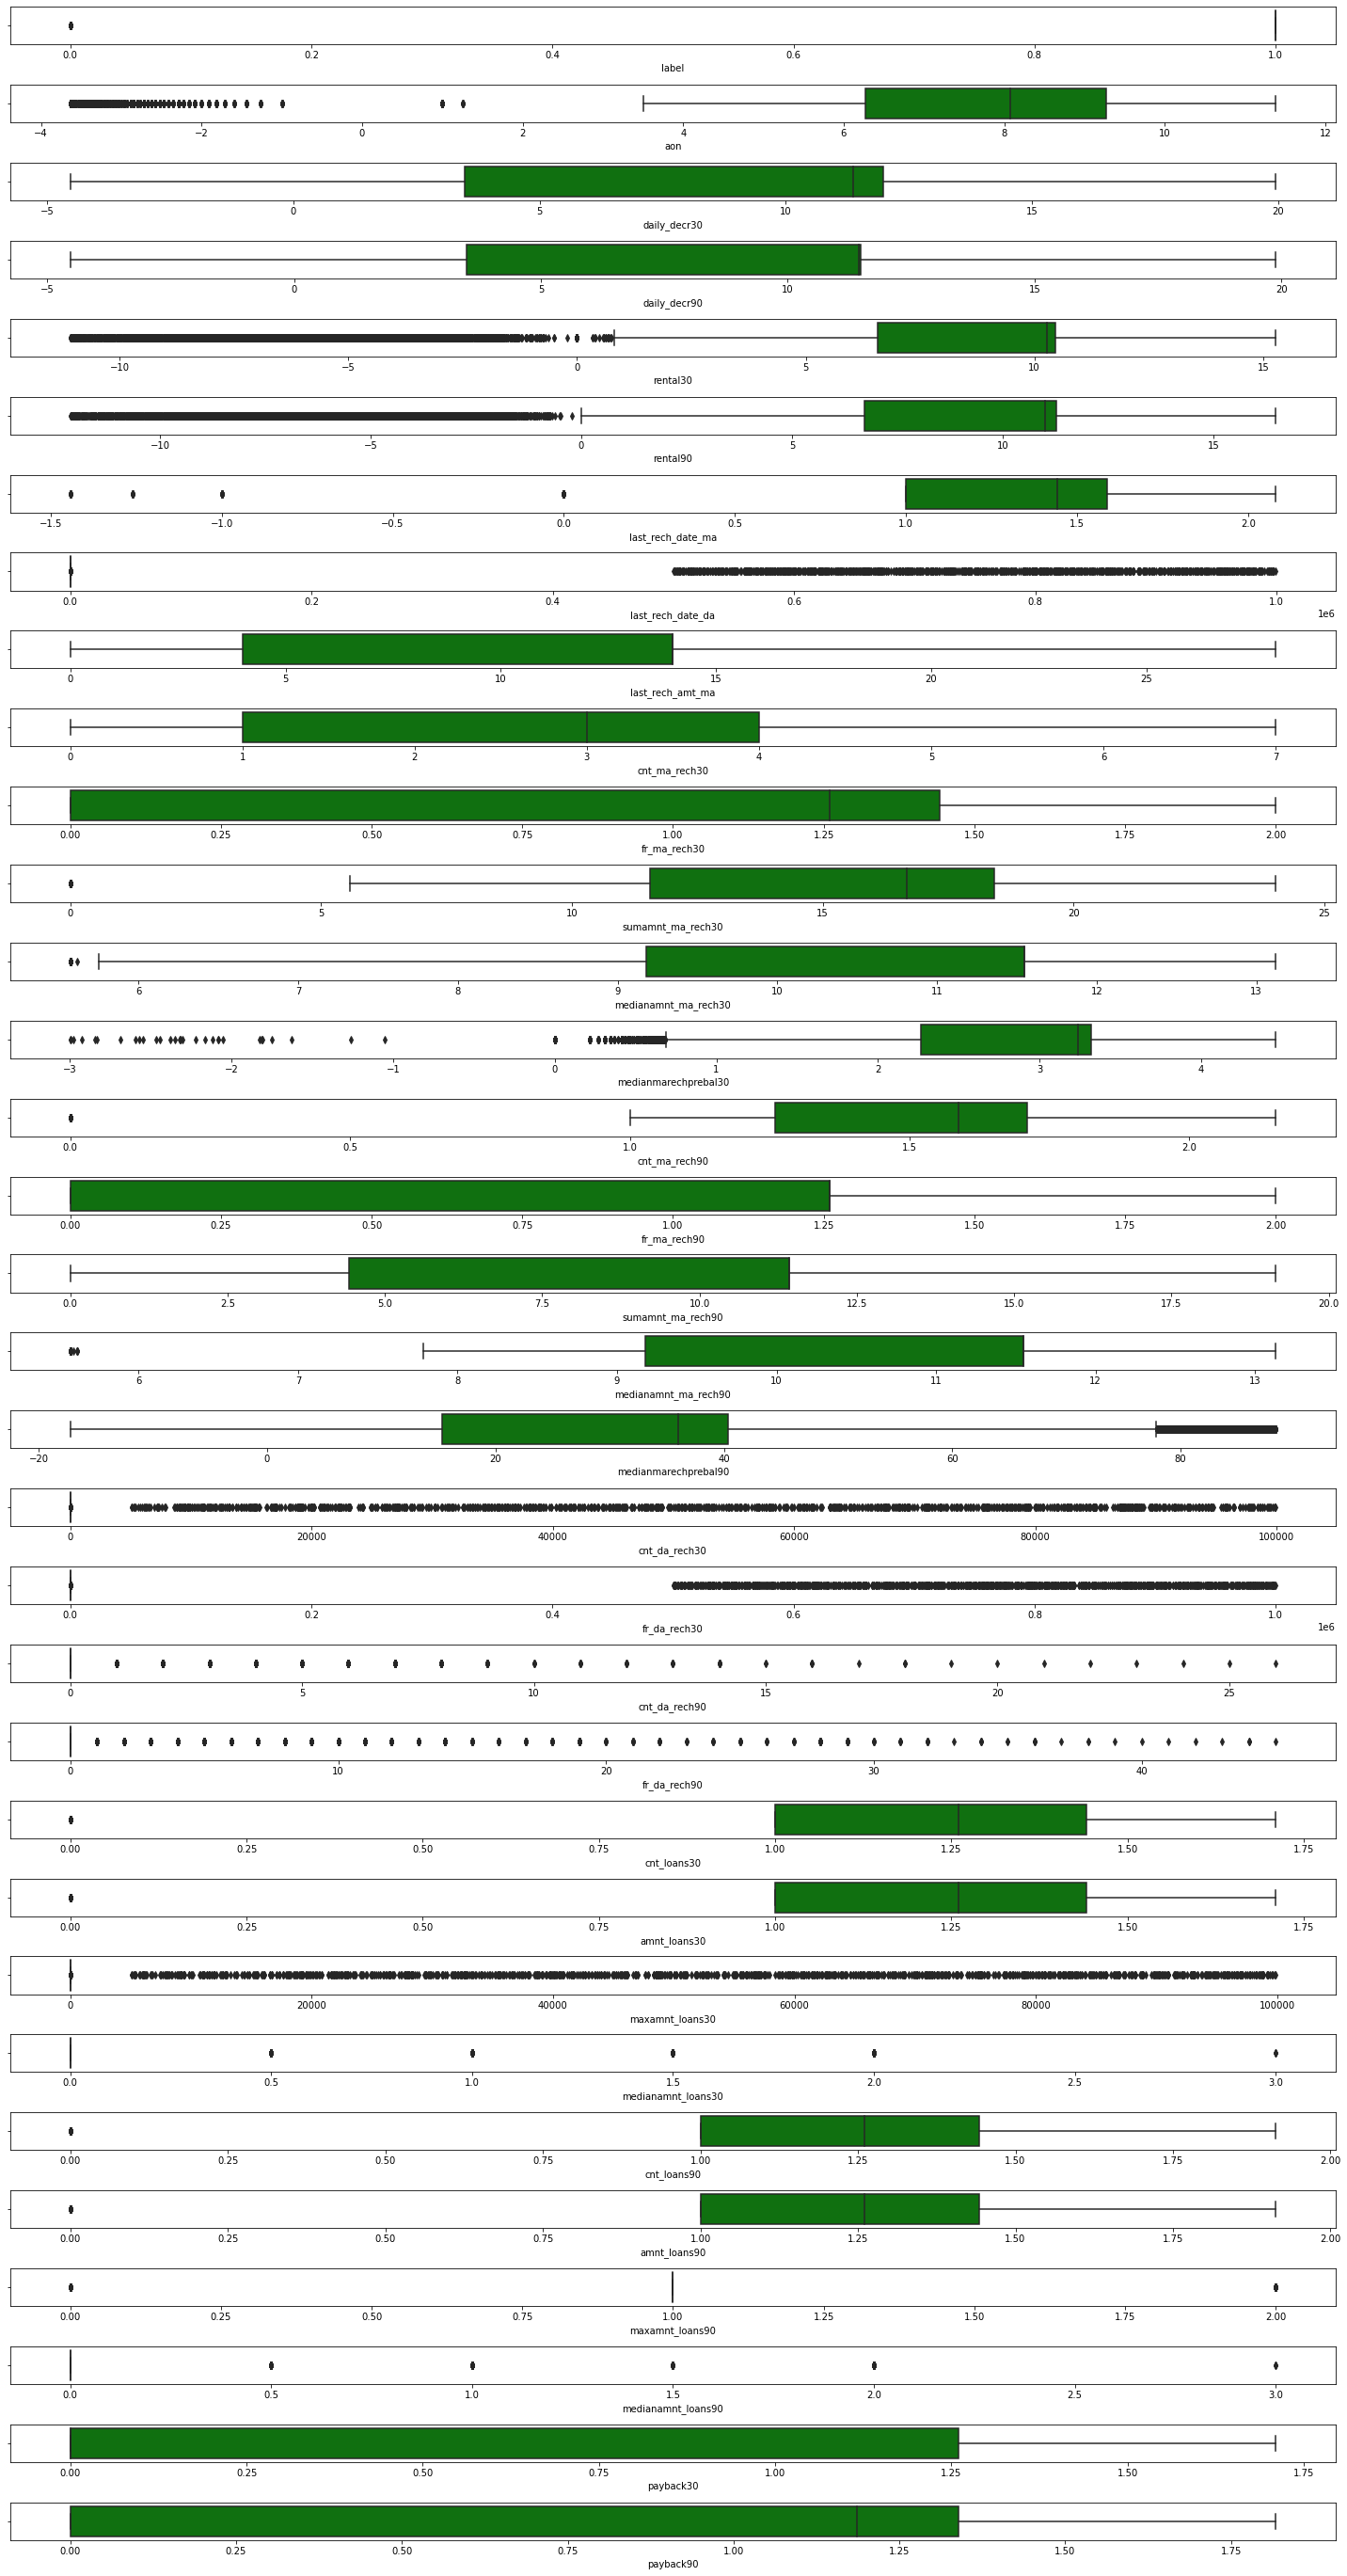

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
collist=Credit.columns.values
ncol=1
nrows=35
j=1
plt.figure(figsize=(20*ncol,40*ncol))
for i in range(0,len(collist)):
    if Credit[collist[i]].dtype != "object":
        plt.subplot(nrows,ncol,j)
        sns.boxplot(Credit[collist[i]],color='green',orient='v')
        j = j+1
        plt.tight_layout()

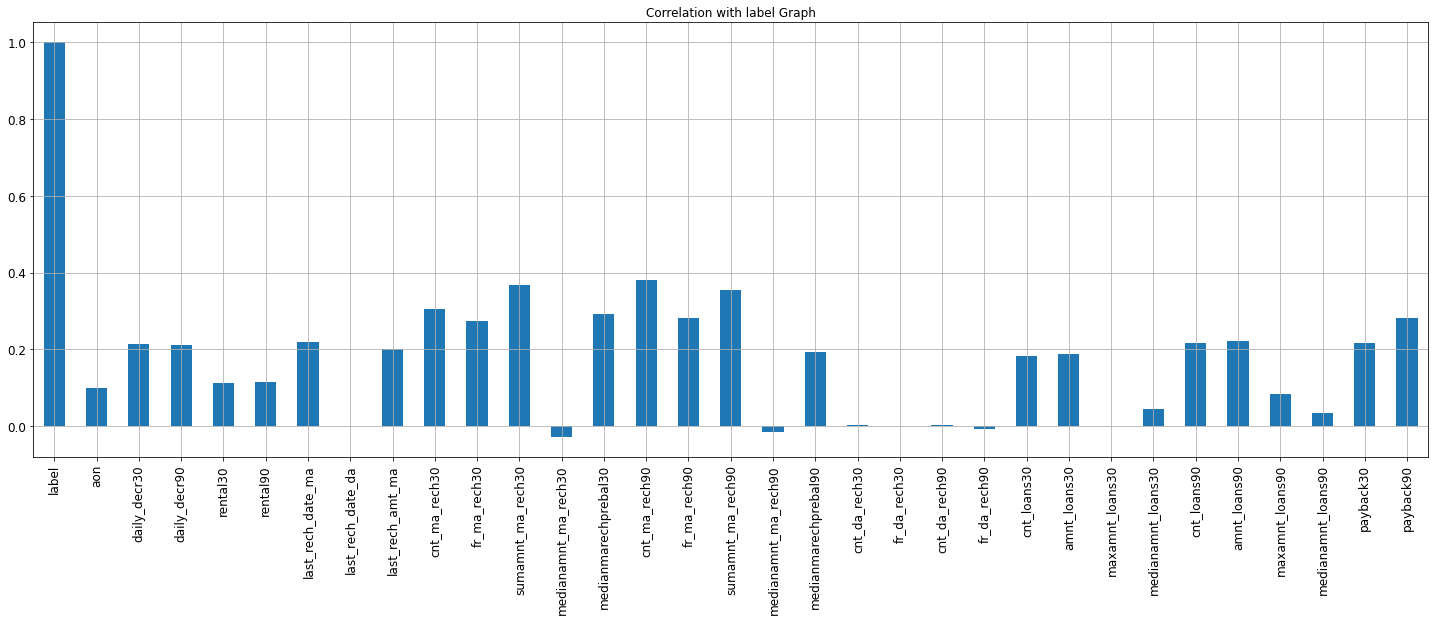

In [48]:
Credit.corrwith(Credit.label).plot.bar(
        figsize = (25, 8), title = "Correlation with label Graph", fontsize = 12,
        rot = 90, grid = True)

In [49]:
#Few columns are not having any correlation with Label, So we'll drop them.
Credit= Credit.drop(['last_rech_date_ma', 'cnt_ma_rech30','fr_ma_rech30','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','maxamnt_loans30','medianamnt_loans30','medianamnt_loans90'], axis = 1)

In [50]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Credit))
print(np.where(z>3))

(array([    30,     41,     41, ..., 209580, 209580, 209580], dtype=int64), array([ 1,  4,  5, ..., 18, 19, 20], dtype=int64))


In [51]:
z=np.abs(zscore(Credit))
threshold=3
new_Credit=Credit[(z<3).all(axis=1)]
print(Credit.shape)
print(new_Credit.shape)

(209593, 23)
(198109, 23)


((209593-198109)/209593)*100 = 5.479%

Almost 5.5% data we lost.

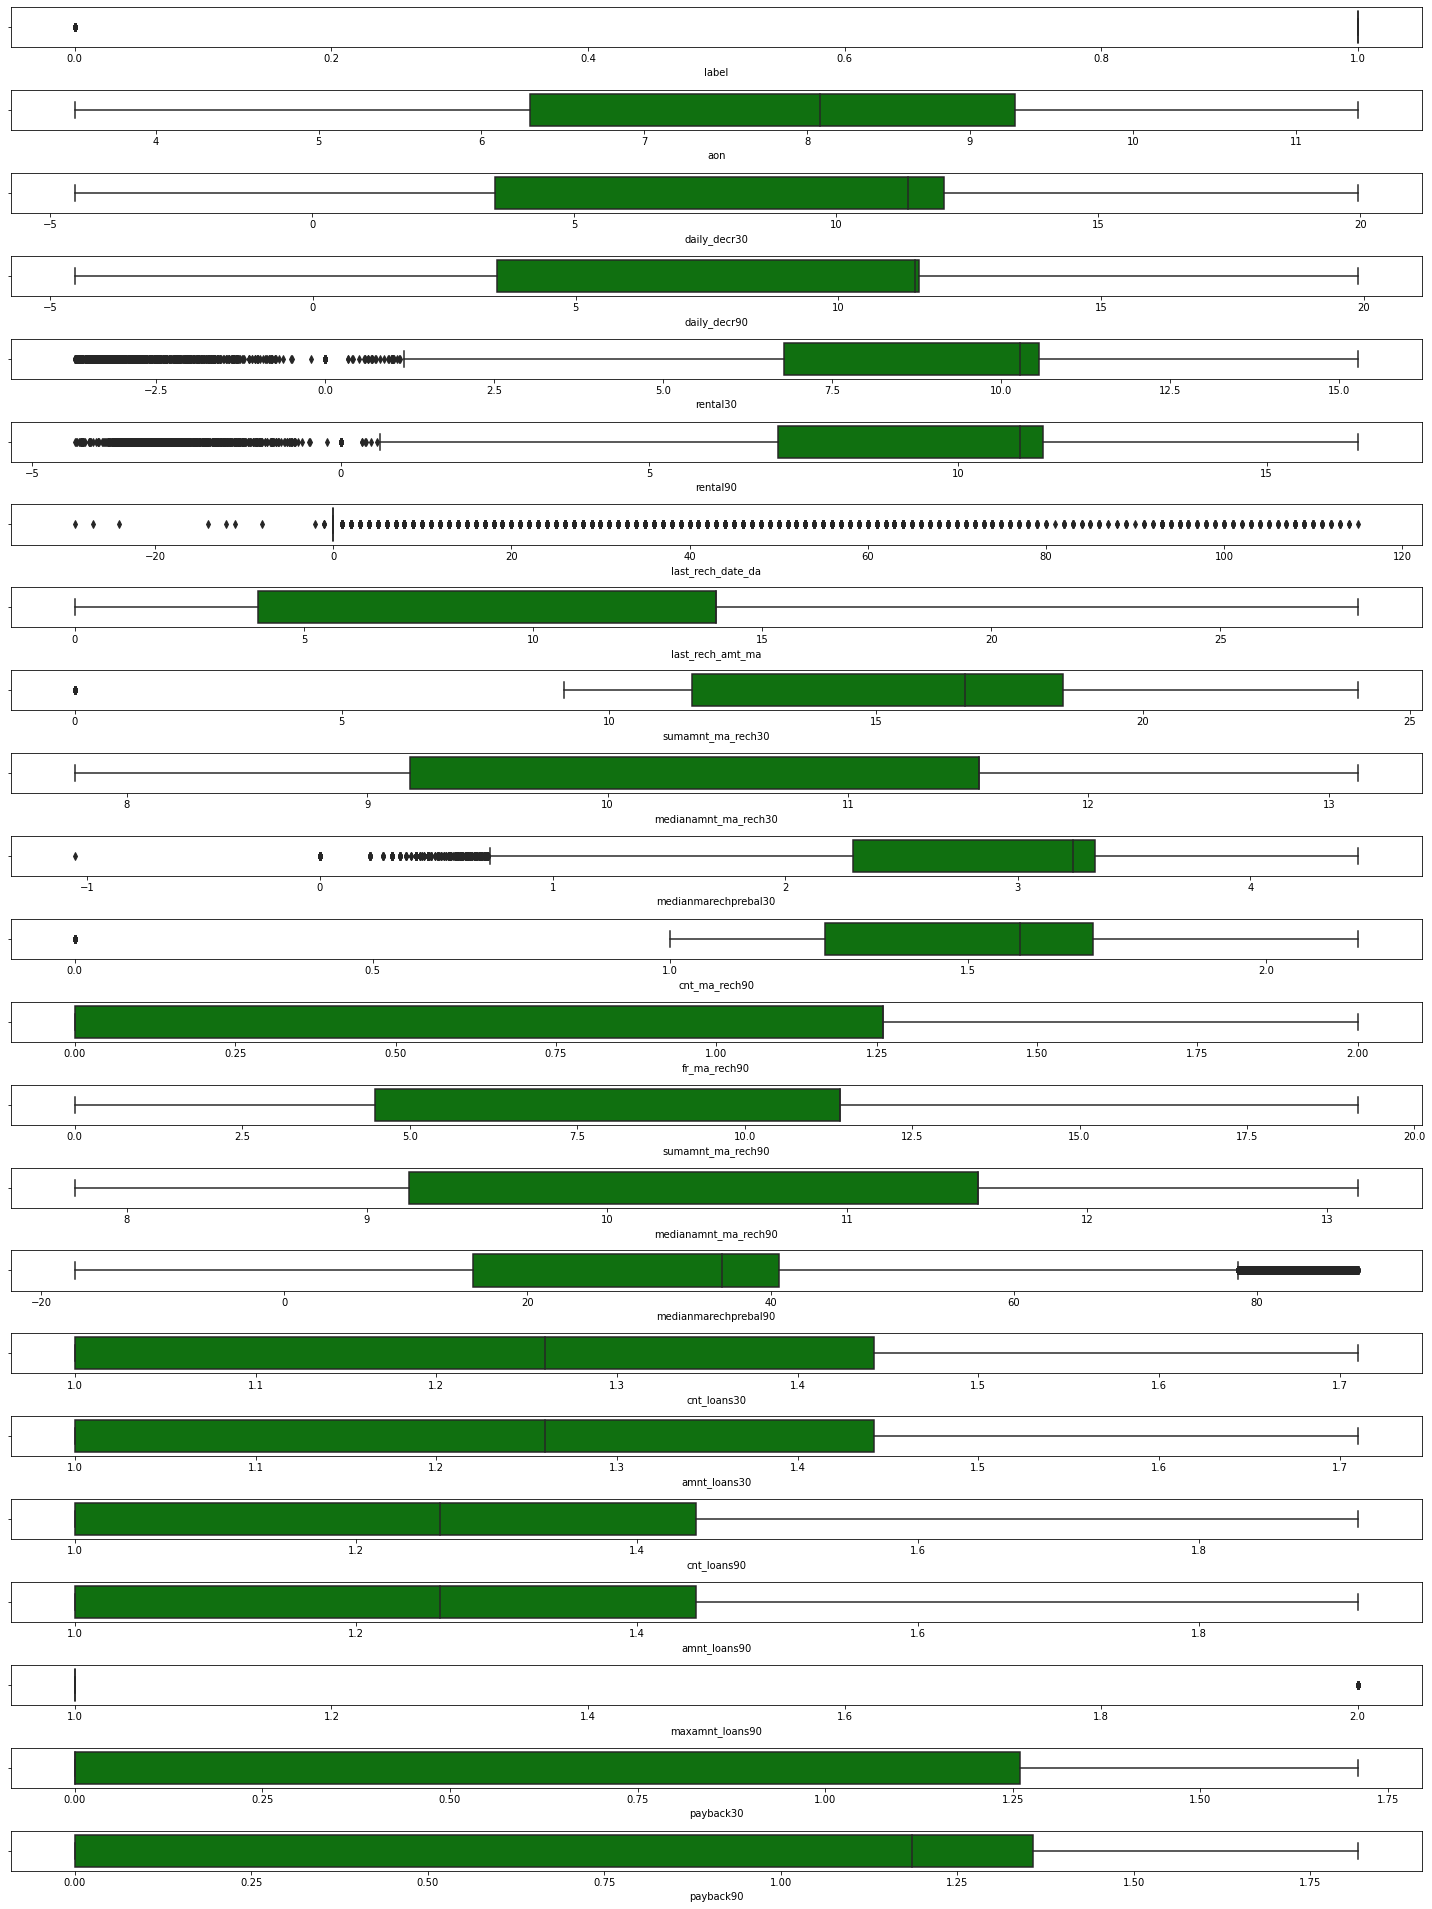

In [52]:
collist=new_Credit.columns
ncol=1
nrows=35
j=1
plt.figure(figsize=(20*ncol,40*ncol))
for i in range(0,len(collist)):
    if new_Credit[collist[i]].dtype != "object":
        plt.subplot(nrows,ncol,j)
        sns.boxplot(new_Credit[collist[i]],color='green',orient='v')
        j = j+1
        plt.tight_layout()

# Seperating Input and Output Variables

In [53]:
y = new_Credit["label"]
x = new_Credit.drop(["label"], axis=1)

# Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_da,last_rech_amt_ma,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,0.377776,0.777770,0.780667,0.513400,0.514296,0.201389,0.500000,0.605459,0.704947,0.545991,0.584804,0.629961,0.287507,0.703798,0.234319,0.366098,0.366098,0.28471,0.28471,0.0,0.000000,0.652478
1,0.688833,0.649429,0.654536,0.736468,0.950773,0.201389,0.500000,0.747274,0.704947,0.904995,0.464159,0.000000,0.500308,0.703798,0.741615,0.000000,0.366098,0.00000,0.28471,1.0,0.000000,0.000000
2,0.585821,0.641806,0.643657,0.704018,0.671726,0.201389,0.500000,0.480553,0.704947,0.925014,0.464159,0.000000,0.164008,0.703798,0.791643,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.000000
3,0.345260,0.298173,0.299032,0.480954,0.468040,0.201389,0.357143,0.000000,0.704947,0.191064,0.464159,0.000000,0.128758,0.381034,0.186943,0.366098,0.366098,0.28471,0.28471,0.0,0.000000,0.000000
4,0.801897,0.402403,0.403563,0.739008,0.703676,0.201389,0.821429,0.693628,0.704947,0.748144,0.928318,0.629961,0.596177,0.703798,0.494883,0.366098,0.366098,1.00000,1.00000,0.0,0.775656,0.729920


# Finding Best Random State

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8832130297982602  on Random_state  99


# Train Test Split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [57]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8832130297982602
[[ 1374  5924]
 [ 1017 51118]]
              precision    recall  f1-score   support

           0       0.57      0.19      0.28      7298
           1       0.90      0.98      0.94     52135

    accuracy                           0.88     59433
   macro avg       0.74      0.58      0.61     59433
weighted avg       0.86      0.88      0.86     59433



In [58]:
#Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

0.7306883381286491
[[ 5294  2004]
 [14002 38133]]
              precision    recall  f1-score   support

           0       0.27      0.73      0.40      7298
           1       0.95      0.73      0.83     52135

    accuracy                           0.73     59433
   macro avg       0.61      0.73      0.61     59433
weighted avg       0.87      0.73      0.77     59433



In [59]:
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier(criterion='gini')---------->default
#DecisionTreeClassifier(criterion='entropy')
#Gini and entropy
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8615583934851009
[[ 3508  3790]
 [ 4438 47697]]
              precision    recall  f1-score   support

           0       0.44      0.48      0.46      7298
           1       0.93      0.91      0.92     52135

    accuracy                           0.86     59433
   macro avg       0.68      0.70      0.69     59433
weighted avg       0.87      0.86      0.86     59433



In [60]:
from sklearn.neighbors import KNeighborsClassifier
#k=5 KNeighbors Classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8984402604613598
[[ 2858  4440]
 [ 1596 50539]]
              precision    recall  f1-score   support

           0       0.64      0.39      0.49      7298
           1       0.92      0.97      0.94     52135

    accuracy                           0.90     59433
   macro avg       0.78      0.68      0.72     59433
weighted avg       0.89      0.90      0.89     59433



In [61]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9111099893998283
[[ 2554  4744]
 [  539 51596]]
              precision    recall  f1-score   support

           0       0.83      0.35      0.49      7298
           1       0.92      0.99      0.95     52135

    accuracy                           0.91     59433
   macro avg       0.87      0.67      0.72     59433
weighted avg       0.90      0.91      0.89     59433



In [62]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR ,x , y, cv=5)
print("Cross validation score of LogisticRegression :",scr.mean())

Cross validation score of LogisticRegression : 0.8797429771307049


In [63]:
scr=cross_val_score(bnb ,x , y, cv=5)
print("Cross validation score of BernoulliNB :",scr.mean())

Cross validation score of BernoulliNB : 0.7326724373017399


In [64]:
scr=cross_val_score(dtc ,x , y, cv=5)
print("Cross validation score of DecisionTreeClassifier :",scr.mean())

Cross validation score of DecisionTreeClassifier : 0.8590876684902


In [65]:
scr=cross_val_score(knn ,x , y, cv=5)
print("Cross validation score of KNeighborsClassifier :",scr.mean())

Cross validation score of KNeighborsClassifier : 0.897369636005916


In [66]:
scr=cross_val_score(rf ,x , y, cv=5)
print("Cross validation score of RandomForestClassifier :",scr.mean())

Cross validation score of RandomForestClassifier : 0.9091611225946379


As we can clearly see Random Forest Classifier have height F1-Score 95%. 91% accuracy and approx 91% Cross validation Score. So we'll train our model using Random Forest Classifier.

# Hyper Parameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"n_estimators":[100,200,300,400,500,600,700,800],
              "max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6],
              "criterion":["gini","entropy"],
              "max_features":['auto','sqrt'],
              "min_samples_split":[2,5,8,10,12,18]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'entropy'}

In [68]:
clf_pred=clf.best_estimator_.predict(x_test) #prediting result based on test based

In [69]:
accuracy_score(y_test,clf_pred) #finding accuracy score of the data

0.9129944643548197

In [70]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.9129944643548197
[[ 2859  4439]
 [  732 51403]]
              precision    recall  f1-score   support

           0       0.80      0.39      0.53      7298
           1       0.92      0.99      0.95     52135

    accuracy                           0.91     59433
   macro avg       0.86      0.69      0.74     59433
weighted avg       0.91      0.91      0.90     59433



Our Model learnt almost 91%

# AUC ROC curve

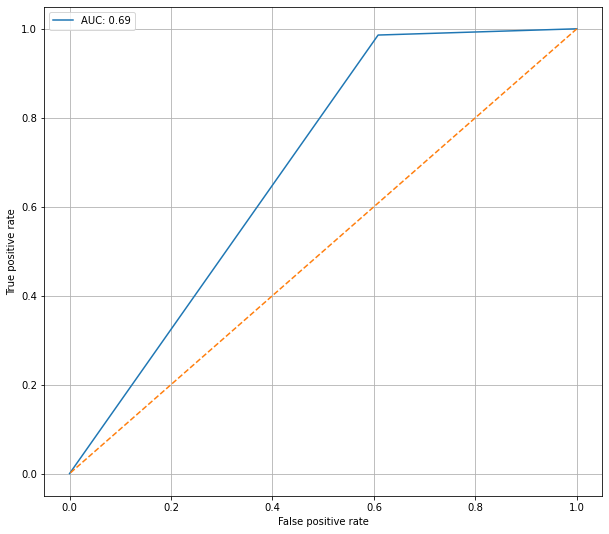

In [71]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid() #adding the grid

# Saving the model

In [72]:
import joblib
joblib.dump(clf.best_estimator_,"PJ1_Credit.obj")
SVR_from_joblib=joblib.load("PJ1_Credit.obj")
Predicted = SVR_from_joblib.predict(x_test)